In [ ]:
#Assignment 3: : Download Abalone dataset. (URL: http://archive.ics.uci.edu/ml/datasets/Abalone)
# a) Predict the number of rings either as a continuous value or as a classification problem.
# b) Predict the age of abalone from physical measurements using linear regression

In [9]:
# !wget http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

In [1]:
# Load the dataset into a Pandas dataframe and add column names
import pandas as pd

names = ['sex', 'length', 'diameter', 'height', 'whole_weight',
         'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
df = pd.read_csv('abalone.data ', names=names)
df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [2]:
# Preprocess the data by converting the sex column to a one-hot encoded categorical variable
df = pd.get_dummies(df, columns=['sex'])
df

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [3]:
# For the Logistic regression problem, 
# Split the dataset into training and testing sets and define the target variable as whether the 
# number of rings is less than or equal to 10 or greater than 10.
from sklearn.model_selection import train_test_split

X = df.drop(['rings'], axis=1)
y = df['rings'].apply(lambda x: 1 if x > 10 else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Train a logistic regression model to classify the number rings
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7739234449760766


In [5]:
# For the linear regression problem, 
# we will define the target variable as the age of the abalone and split the dataset into training and testing sets
X = df.drop(['rings'], axis=1)
y = df['rings'] + 1.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train a linear regression model to predict the age
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
mse = ((y_test - reg.predict(X_test)) ** 2).mean()
print("Mean Squared Error:", mse)

Mean Squared Error: 4.894112034847862


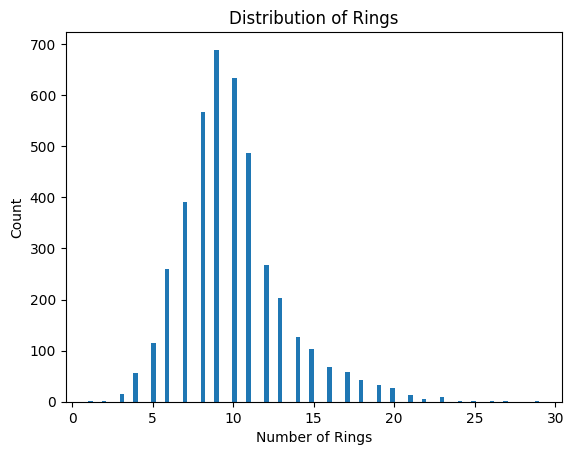

In [7]:
# Histogram to visualize the distribution of the target variable (number of rings)
import matplotlib.pyplot as plt

plt.hist(df['rings'], bins=100)
plt.xlabel('Number of Rings')
plt.ylabel('Count')
plt.title('Distribution of Rings')
plt.show()

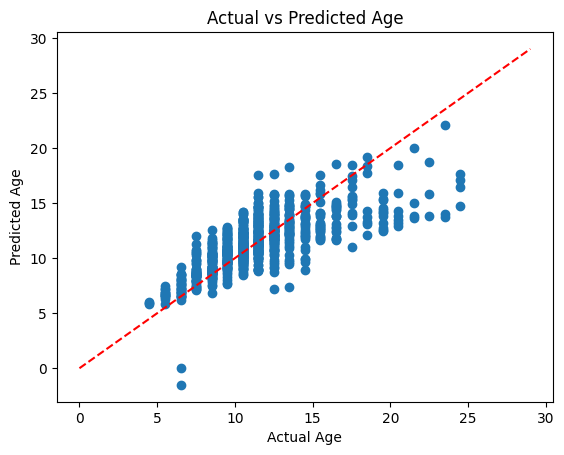

In [11]:
import numpy as np

y_pred = reg.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot(np.arange(0, 30), np.arange(0, 30), 'r--')
plt.title('Actual vs Predicted Age')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.show()